In [8]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec

from sklearn.metrics import roc_auc_score
import joblib
from scipy import stats

In [100]:
def ConfidenceIntervalls(mu_values, nll1D, central=4.0):
    z = np.polyfit(mu_values[(mu_values-central)<=1], nll1D[(mu_values-central)<=1], 4)
    poly = np.poly1d(z)
    #1 Sigma = 0.5, 2 Sigma = 2, 3 Sigma = 4.5
    threshs = [0.5, 2.0, 4.5]
    threshs = [0.5, 2.0, 4.5]
    sigmas = [1.0, 2.0, 3.0]
    ret_intersects = []
    std = 0.0
    
    for t,s  in zip(threshs, sigmas):
        intersects = (poly - t).roots
        # Select 2 roots closest to central value (only needed for polynomials with order > 2
        ret_intersects.append(intersects[np.argsort(np.abs(intersects-central))][:2])    
        std += (abs(ret_intersects[-1][0] - ret_intersects[-1][1])/(s*2))
        
    std = std/len(sigmas)
    
    #plt.plot(mu_values[(mu_values-central)<=1], nll1D[(mu_values-central)<=1])
    #plt.plot(np.linspace(central-1,central+1, 100), poly(np.linspace(0,2, 100)))
    return std, ret_intersects
    


In [101]:
mean = 4
std = 1
n_exp = 1000
n_data = 100


mu_range = np.arange(0, 9, 0.10)

data = np.random.normal(mean, std, (n_exp, n_data))

min_mu, minnll = 999,999
mus = []
nll_full = []

for mu in mu_range:    
    nll_mu = (stats.norm.logpdf(data, loc=mu, scale=1))
    
    nll_mu_exp = -np.sum(nll_mu, axis=1)
    nll_full.append(nll_mu_exp)

nll_full = np.array(nll_full)

arg_min_nll_full = np.argmin(nll_full, axis=0)

mus = mu_range[arg_min_nll_full]



(90, 1000)
(1, 100)
0.10113968773543609


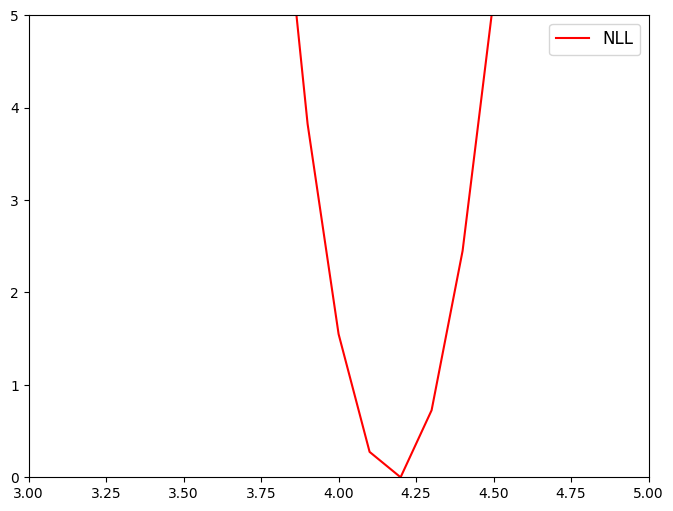

In [102]:
data = np.random.normal(mean, std, (1, n_data))

nll1d = np.zeros(mu_range.shape[0])
print(nll_full.shape)
print(data.shape)

for k, mu in enumerate(mu_range):    
    nll_full = (stats.norm.logpdf(data, loc=mu, scale=1))

    nll = -np.sum(nll_full[0])
    nll1d[k] = nll


        
sigma_clf_nom, _ = ConfidenceIntervalls(mu_values=mu_range, nll1D=nll1d-min(nll1d))
        
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)  
subplot.plot(mu_range, nll1d-min(nll1d), label='NLL', color='r')
subplot.set_xlim([3,5])
subplot.set_ylim([0,5])
subplot.legend(fontsize=12)

print(sigma_clf_nom)

0.10544458260147843 0.10113968773543609


(3.0, 5.0)

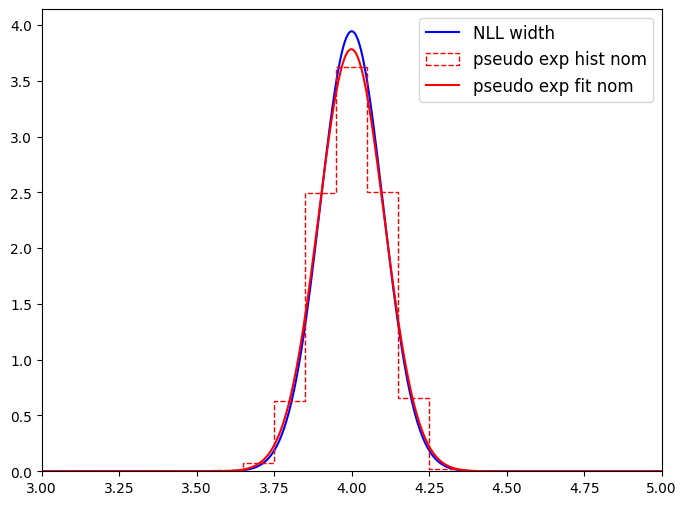

In [103]:
from scipy.stats import norm


fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)  

x_gauss = np.linspace(2.0, 6.0, 1000)
y_gauss = (norm.pdf((x_gauss-4)/sigma_clf_nom))/sigma_clf_nom

print(np.std(mus), sigma_clf_nom)

y_gauss_fit = (norm.pdf((x_gauss-np.mean(mus))/np.std(mus)))/np.std(mus)


subplot.plot(x_gauss, y_gauss, label='NLL width', color='b')
subplot.hist(mus, bins=np.arange(2.95, 5.05, 0.1), density = True, label='pseudo exp hist nom', histtype='step', color='r', ls='--')
subplot.plot(x_gauss, y_gauss_fit, label='pseudo exp fit nom', color='r')
subplot.legend(fontsize=12)
subplot.set_xlim([3,5])


